In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_theme(style='whitegrid', palette='deep')

import os
import mido
import pretty_midi as pm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Flatten

import tensorflow as tf
# import torch as pt
import joblib
import streamlit as st

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
def extract_all_tempos(file_path):
    midi_data = pm.PrettyMIDI(file_path)
    _, tempos = midi_data.get_tempo_changes()
    return tempos

def load_midi_files_tempos_to_df(directory_path, composer):
    midi_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.lower().endswith(('.mid', '.midi'))]
    data = []
    max_tempos = 0  # To track the maximum number of tempo changes in any file
    
    for file in midi_files:
        try:
            tempos = extract_all_tempos(file)
            max_tempos = max(max_tempos, len(tempos))
            features = {'composer': composer}
            features.update({f'tempo_{i+1}': tempo for i, tempo in enumerate(tempos)})
            data.append(features)
        except Exception as e:
            print(f"Error processing file {file}: {e}")
    
    # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(data)
    
    # Ensure all rows have the same number of columns by filling with NaN where necessary
    for i in range(1, max_tempos + 1):
        if f'tempo_{i}' not in df.columns:
            df[f'tempo_{i}'] = pd.NA
    
    return df

file_path = 'C:\\Users\\gabri\\OneDrive\\Desktop\\MSAAI\\AAI-511\\aai-511_group1\\midiclassics\\'  # Replace with your actual path
composers = ['Bach', 'Beethoven', 'Chopin', 'Mozart']

# Dictionary to hold DataFrames for each composer
composer_dataframes = {}

random_state = 88

for composer in composers:
    composer_folder = os.path.join(file_path, composer)
    composer_df = load_midi_files_tempos_to_df(composer_folder, composer)

    if composer == 'Bach':
        composer_df = composer_df.sample(n=250, random_state=random_state)

    composer_dataframes[composer] = composer_df
    print(f"{composer} DataFrame:")
    print(composer_df.head())

# Merge all DataFrames into a single DataFrame
all_composers_df = pd.concat(composer_dataframes.values(), ignore_index=True)

# Display the merged DataFrame
print("Merged DataFrame:")
print(all_composers_df.head())


c:\Users\gabri\anaconda3\envs\tf\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Bach DataFrame:
    composer     tempo_1   tempo_2    tempo_3   tempo_4    tempo_5   tempo_6  \
5       Bach   96.000000       NaN        NaN       NaN        NaN       NaN   
824     Bach   90.044527  75.03705  90.044527  75.03705  90.044527  75.03705   
352     Bach   96.000000       NaN        NaN       NaN        NaN       NaN   
338     Bach  104.000014       NaN        NaN       NaN        NaN       NaN   
737     Bach   88.000023       NaN        NaN       NaN        NaN       NaN   

       tempo_7    tempo_8   tempo_9  ...  tempo_862  tempo_863  tempo_864  \
5          NaN        NaN       NaN  ...        NaN        NaN        NaN   
824  60.029655  90.044527  75.03705  ...        NaN        NaN        NaN   
352        NaN        NaN       NaN  ...        NaN        NaN        NaN   
338        NaN        NaN       NaN  ...        NaN        NaN        NaN   
737        NaN        NaN       NaN  ...        NaN        NaN        NaN   

     tempo_865  tempo_866  tempo_867  te

c:\Users\gabri\anaconda3\envs\tf\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Beethoven DataFrame:
    composer     tempo_1     tempo_2     tempo_3     tempo_4     tempo_5  \
0  Beethoven  236.031833         NaN         NaN         NaN         NaN   
1  Beethoven  167.999933  288.000461  167.999933  170.000085  172.000103   
2  Beethoven  120.000000  160.000000  135.000135  151.999939  167.999933   
3  Beethoven  109.999908  150.999997  104.000014  117.999902  109.999908   
4  Beethoven  120.000000   85.000043   89.000040   85.000043   83.000065   

      tempo_6     tempo_7     tempo_8     tempo_9  ...  tempo_3742  \
0         NaN         NaN         NaN         NaN  ...         NaN   
1  173.999791  176.000047  177.999816  180.000180  ...         NaN   
2  151.999939  167.999933  160.000000  151.999939  ...         NaN   
3  113.000096  115.000029   96.999953   93.999981  ...         NaN   
4   89.000040   85.000043   89.000040   83.000065  ...         NaN   

   tempo_3743  tempo_3744  tempo_3745  tempo_3746  tempo_3747  tempo_3748  \
0         NaN         Na

c:\Users\gabri\anaconda3\envs\tf\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Chopin DataFrame:
  composer     tempo_1     tempo_2     tempo_3     tempo_4     tempo_5  \
0   Chopin  180.000180         NaN         NaN         NaN         NaN   
1   Chopin  144.053127  170.082972  195.149240  203.097233  210.012706   
2   Chopin  100.031843   98.023679   99.017581  100.031843   99.017581   
3   Chopin  120.007440  119.032268  118.013363  117.011754  116.027003   
4   Chopin   63.003966         NaN         NaN         NaN         NaN   

      tempo_6     tempo_7     tempo_8     tempo_9  ...  tempo_2883  \
0         NaN         NaN         NaN         NaN  ...         NaN   
1  204.158713  203.097233  180.010981  183.104910  ...         NaN   
2  100.031843   98.023679   99.017581   98.023679  ...         NaN   
3  115.002233  114.050878  113.006055  112.033730  ...         NaN   
4         NaN         NaN         NaN         NaN  ...         NaN   

   tempo_2884  tempo_2885  tempo_2886  tempo_2887  tempo_2888  tempo_2889  \
0         NaN         NaN         NaN  

c:\Users\gabri\anaconda3\envs\tf\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Error processing file C:\Users\gabri\OneDrive\Desktop\MSAAI\AAI-511\aai-511_group1\midiclassics\Mozart\K281 Piano Sonata n03 3mov.mid: Could not decode key with 2 flats and mode 2
Mozart DataFrame:
  composer     tempo_1     tempo_2     tempo_3     tempo_4     tempo_5  \
0   Mozart  125.000000  116.999889  108.999944  100.000000         NaN   
1   Mozart   35.999993   36.999991   38.000009   36.999991   34.999994   
2   Mozart  137.999876  123.999992  109.999908   96.000000         NaN   
3   Mozart  110.000110         NaN         NaN         NaN         NaN   
4   Mozart  130.000130  129.000077  128.000000  127.000254  126.000126   

      tempo_6     tempo_7     tempo_8     tempo_9  ...  tempo_2916  \
0         NaN         NaN         NaN         NaN  ...         NaN   
1   35.999993   36.999991   35.999993   36.999991  ...         NaN   
2         NaN         NaN         NaN         NaN  ...         NaN   
3         NaN         NaN         NaN         NaN  ...         NaN   
4  125.

In [3]:
all_composers_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 3752 columns):
 #     Column      Dtype  
---    ------      -----  
 0     composer    object 
 1     tempo_1     float64
 2     tempo_2     float64
 3     tempo_3     float64
 4     tempo_4     float64
 5     tempo_5     float64
 6     tempo_6     float64
 7     tempo_7     float64
 8     tempo_8     float64
 9     tempo_9     float64
 10    tempo_10    float64
 11    tempo_11    float64
 12    tempo_12    float64
 13    tempo_13    float64
 14    tempo_14    float64
 15    tempo_15    float64
 16    tempo_16    float64
 17    tempo_17    float64
 18    tempo_18    float64
 19    tempo_19    float64
 20    tempo_20    float64
 21    tempo_21    float64
 22    tempo_22    float64
 23    tempo_23    float64
 24    tempo_24    float64
 25    tempo_25    float64
 26    tempo_26    float64
 27    tempo_27    float64
 28    tempo_28    float64
 29    tempo_29    float64
 30    tempo_30    float64
 3

In [4]:
all_composers_df['composer'].value_counts()

composer
Mozart       254
Bach         250
Beethoven    217
Chopin       134
Name: count, dtype: int64

In [5]:
all_composers_df.head()

,composer,tempo_1,tempo_2,tempo_3,tempo_4,tempo_5,tempo_6,tempo_7,tempo_8,tempo_9,...,tempo_3742,tempo_3743,tempo_3744,tempo_3745,tempo_3746,tempo_3747,tempo_3748,tempo_3749,tempo_3750,tempo_3751
0,Bach,96.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bach,90.044527,75.03705,90.044527,75.03705,90.044527,75.03705,60.029655,90.044527,75.03705,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bach,96.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bach,104.000014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bach,88.000023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# # Assuming 'row_index' is the index of the row you want to check
# row_index = 1  # Replace with the actual row index

# # Filter columns that start with 'tempo_'
# tempo_columns = [col for col in all_composers_df.columns if col.startswith('tempo_')]

# # Get the distinct values in the selected row for 'tempo_' columns, excluding NaN values
# distinct_tempo_values = all_composers_df.loc[row_index, tempo_columns].dropna().unique()

# # Count the number of distinct non-NaN values
# num_distinct_values = len(distinct_tempo_values)

# # Display the number and the distinct values
# print(f"Number of distinct non-NaN tempo values in row {row_index}: {num_distinct_values}")
# print(f"Distinct non-NaN tempo values: {distinct_tempo_values}")

In [7]:
# Forward fill NaN values with the previous known value
tempo_df = all_composers_df.T.fillna(method='ffill').T



In [8]:
tempo_df.head()

,composer,tempo_1,tempo_2,tempo_3,tempo_4,tempo_5,tempo_6,tempo_7,tempo_8,tempo_9,...,tempo_3742,tempo_3743,tempo_3744,tempo_3745,tempo_3746,tempo_3747,tempo_3748,tempo_3749,tempo_3750,tempo_3751
0,Bach,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,...,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0
1,Bach,90.044527,75.03705,90.044527,75.03705,90.044527,75.03705,60.029655,90.044527,75.03705,...,40.01977,40.01977,40.01977,40.01977,40.01977,40.01977,40.01977,40.01977,40.01977,40.01977
2,Bach,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,...,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0
3,Bach,104.000014,104.000014,104.000014,104.000014,104.000014,104.000014,104.000014,104.000014,104.000014,...,104.000014,104.000014,104.000014,104.000014,104.000014,104.000014,104.000014,104.000014,104.000014,104.000014
4,Bach,88.000023,88.000023,88.000023,88.000023,88.000023,88.000023,88.000023,88.000023,88.000023,...,88.000023,88.000023,88.000023,88.000023,88.000023,88.000023,88.000023,88.000023,88.000023,88.000023


In [9]:
# # Step 1: Filter columns that start with 'tempo_'
# tempo_columns = [col for col in tempo_df.columns if col.startswith('tempo_')]

# # Step 2: Count non-NaN values in each row
# tempo_df['num_tempo_changes'] = tempo_df[tempo_columns].count(axis=1)

# # Step 3: Find the row with the maximum number of tempo changes
# max_tempo_changes_row = tempo_df['num_tempo_changes'].idxmax()  # Get the index of the row with the most tempo changes
# max_tempo_changes = tempo_df.loc[max_tempo_changes_row, 'num_tempo_changes']

# # Display the row and the number of tempo changes
# print(f"Row with the most tempo changes: {max_tempo_changes_row}")
# print(f"Number of tempo changes: {max_tempo_changes}")
# print(tempo_df.loc[max_tempo_changes_row])

In [10]:
# # Step 1: Filter columns that start with 'tempo_'
# tempo_columns = [col for col in all_composers_df.columns if col.startswith('tempo_')]

# # Step 2: Count non-NaN values in each row
# all_composers_df['num_tempo_changes'] = all_composers_df[tempo_columns].count(axis=1)

# # Step 3: Find the row with the maximum number of tempo changes
# max_tempo_changes_row = all_composers_df['num_tempo_changes'].idxmax()  # Get the index of the row with the most tempo changes
# max_tempo_changes = all_composers_df.loc[max_tempo_changes_row, 'num_tempo_changes']

# # Display the row and the number of tempo changes
# print(f"Row with the most tempo changes: {max_tempo_changes_row}")
# print(f"Number of tempo changes: {max_tempo_changes}")
# print(all_composers_df.loc[max_tempo_changes_row])

In [11]:
# all_composers_df['has_nan'] = all_composers_df.isna().any(axis=1)

# # Step 2: Count the number of `NaN` values in each row
# all_composers_df['num_nan'] = all_composers_df.isna().sum(axis=1)

# row_index = 352  # Replace with the row index you want to check
# if all_composers_df.loc[row_index, 'has_nan']:
#     print(f"Row {row_index} has {all_composers_df.loc[row_index, 'num_nan']} NaN values.")
# else:
#     print(f"Row {row_index} has no NaN values.")

In [12]:
all_composers_df.head()

,composer,tempo_1,tempo_2,tempo_3,tempo_4,tempo_5,tempo_6,tempo_7,tempo_8,tempo_9,...,tempo_3742,tempo_3743,tempo_3744,tempo_3745,tempo_3746,tempo_3747,tempo_3748,tempo_3749,tempo_3750,tempo_3751
0,Bach,96.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bach,90.044527,75.03705,90.044527,75.03705,90.044527,75.03705,60.029655,90.044527,75.03705,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bach,96.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bach,104.000014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bach,88.000023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


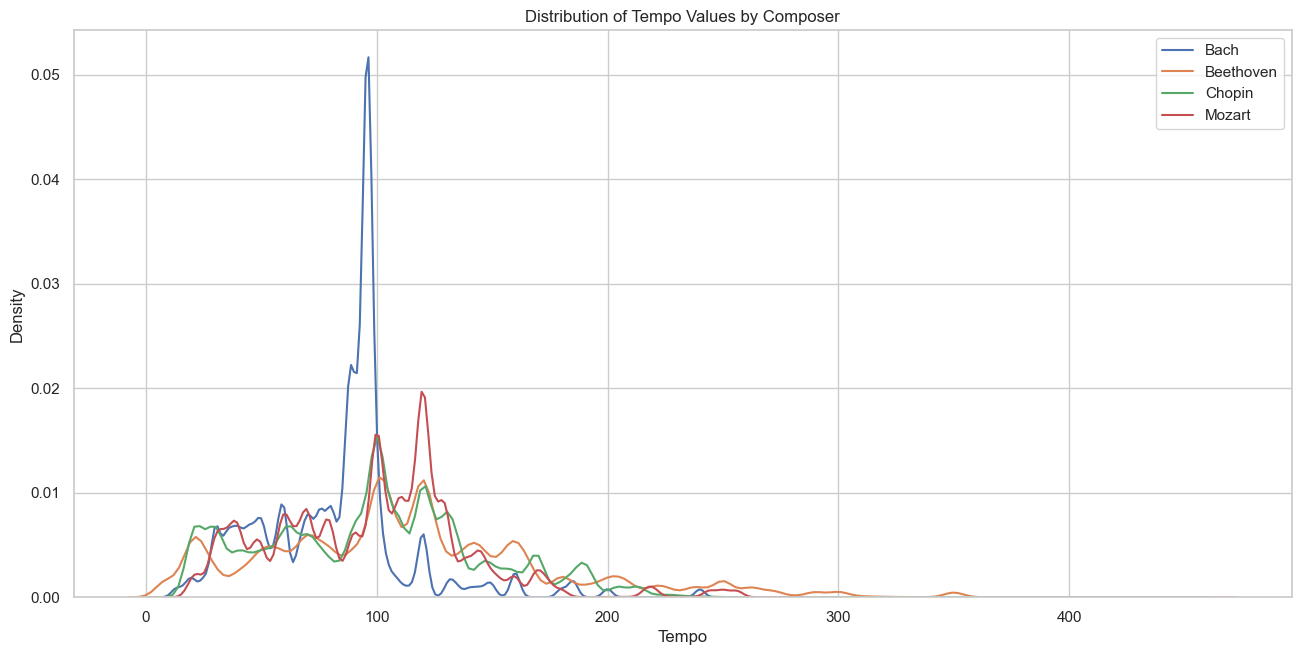

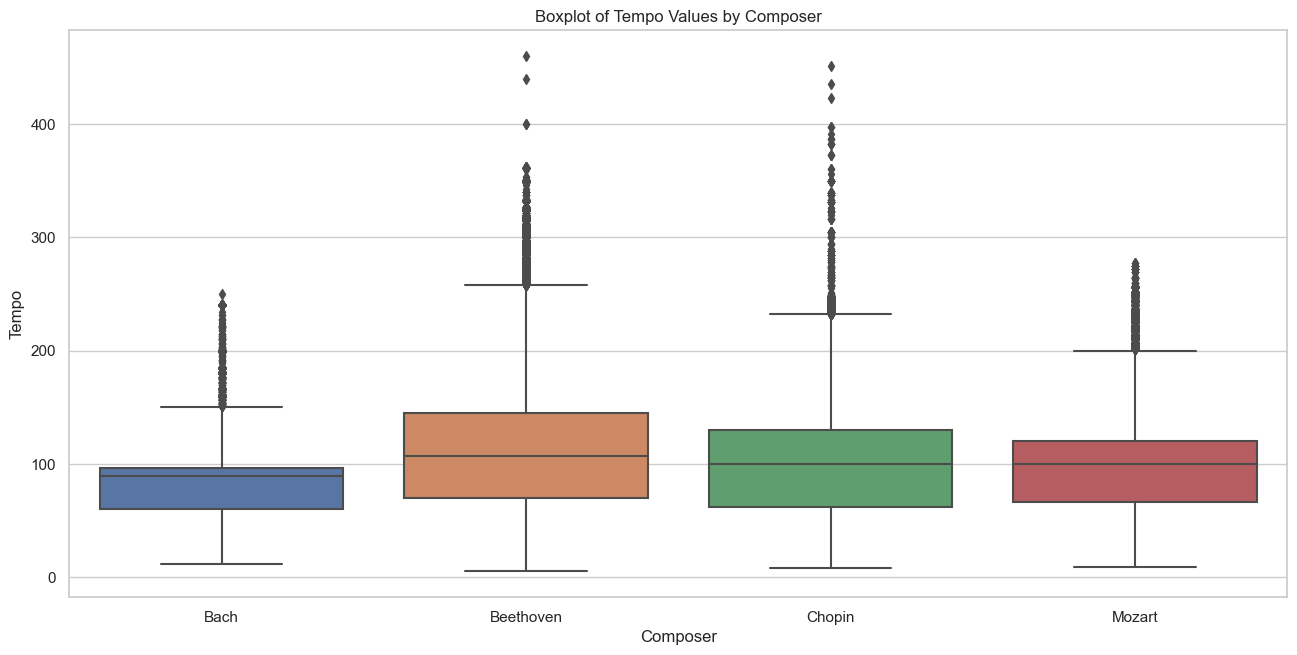

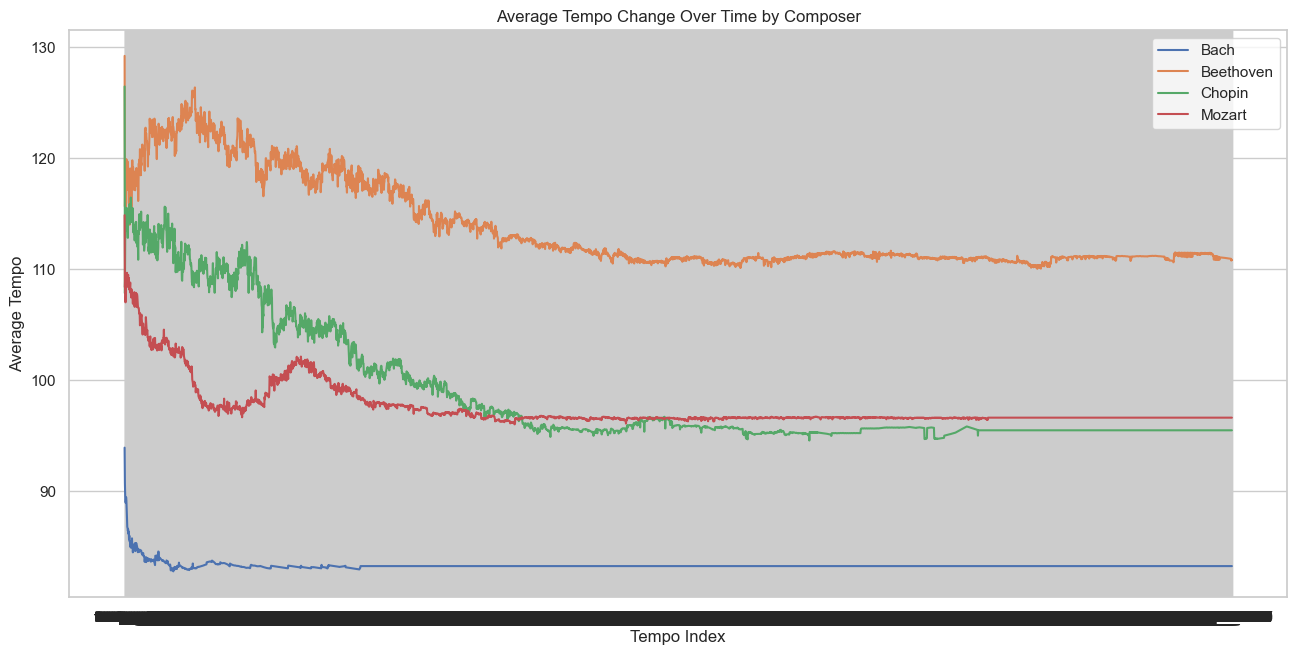

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Distribution of Tempo Values for Each Composer

plt.figure(figsize=(14, 7))
for composer in tempo_df['composer'].unique():
    sns.kdeplot(data=tempo_df[tempo_df['composer'] == composer].drop(columns='composer').stack(), label=composer)

plt.title('Distribution of Tempo Values by Composer')
plt.xlabel('Tempo')
plt.ylabel('Density')
plt.legend()
plt.show()

# 2. Boxplot of Tempo Values by Composer

plt.figure(figsize=(14, 7))
sns.boxplot(x='composer', y='value', data=tempo_df.melt(id_vars='composer', value_vars=tempo_df.columns[1:]))
plt.title('Boxplot of Tempo Values by Composer')
plt.xlabel('Composer')
plt.ylabel('Tempo')
plt.show()

# 3. Line Plot of Tempo Changes Over Time for Each Composer

plt.figure(figsize=(14, 7))
for composer in tempo_df['composer'].unique():
    mean_tempo = tempo_df[tempo_df['composer'] == composer].drop(columns='composer').mean(axis=0)
    plt.plot(mean_tempo, label=composer)

plt.title('Average Tempo Change Over Time by Composer')
plt.xlabel('Tempo Index')
plt.ylabel('Average Tempo')
plt.legend()
plt.show()


In [14]:
X = tempo_df.drop(columns='composer')
y = tempo_df['composer']

# Encode the composer labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
model = Sequential([
   # Dense(1024, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    Dense(512, input_shape=(3751,), activation='relu'),  # Input layer with 3752 nodes
    Dense(256, activation='relu'), 
    #Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    #Dropout(0.3),
    Dense(64, activation='relu'), 
    #Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'), 
    #Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer with softmax activation for multiclass classification
])


In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [17]:
history = model.fit(X_train_scaled, y_train, epochs=200, validation_split=0.2, batch_size=16, verbose=1)


Epoch 1/200
35/35 [==============================] - 1s 22ms/step - loss: 1.4798 - accuracy: 0.3053 - val_loss: 1.3610 - val_accuracy: 0.4453
Epoch 2/200
35/35 [==============================] - 1s 15ms/step - loss: 1.3890 - accuracy: 0.3857 - val_loss: 1.3407 - val_accuracy: 0.4161
Epoch 3/200
35/35 [==============================] - 1s 22ms/step - loss: 1.3500 - accuracy: 0.4022 - val_loss: 1.3271 - val_accuracy: 0.4161
Epoch 4/200
35/35 [==============================] - 0s 11ms/step - loss: 1.2999 - accuracy: 0.4333 - val_loss: 1.3625 - val_accuracy: 0.4453
Epoch 5/200
35/35 [==============================] - 1s 22ms/step - loss: 1.3051 - accuracy: 0.4059 - val_loss: 1.2697 - val_accuracy: 0.4161
Epoch 6/200
35/35 [==============================] - 1s 18ms/step - loss: 1.2907 - accuracy: 0.4461 - val_loss: 1.3223 - val_accuracy: 0.3577
Epoch 7/200
35/35 [==============================] - 0s 13ms/step - loss: 1.2585 - accuracy: 0.4113 - val_loss: 1.2846 - val_accuracy: 0.4818
Epoch 

In [18]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

6/6 [==============================] - 0s 9ms/step - loss: 1.5264 - accuracy: 0.5380
Test Accuracy: 53.80%


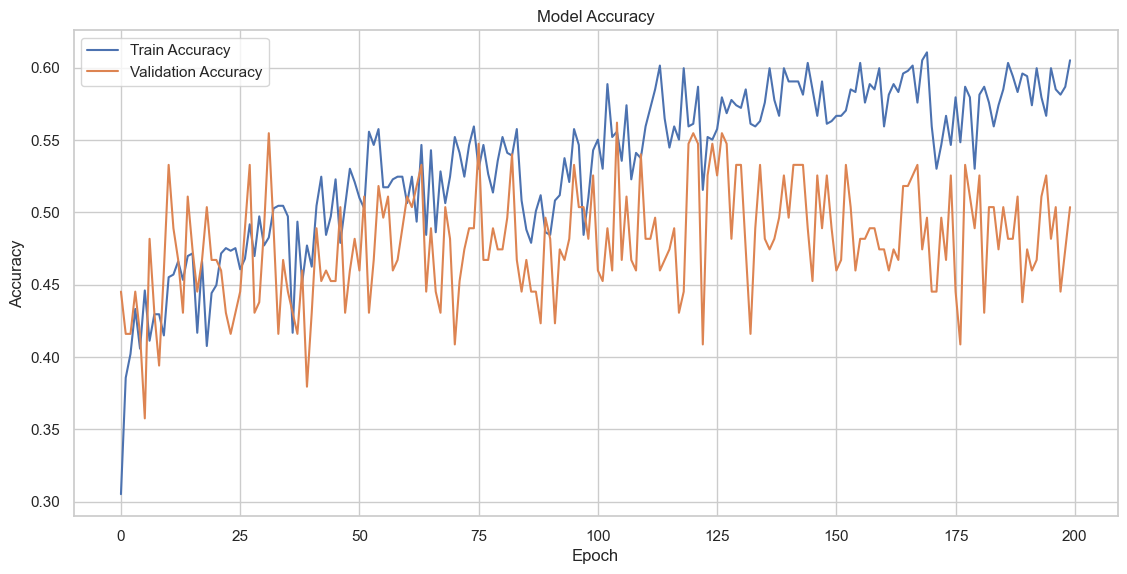

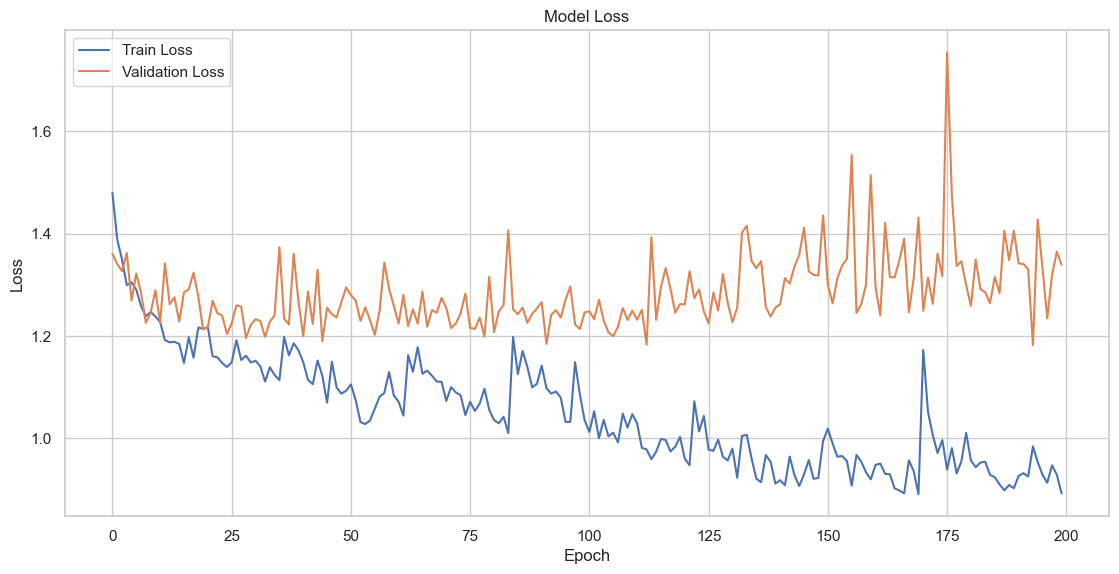

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
midi_stream = pm.PrettyMIDI('C:\\Users\\gabri\\OneDrive\\Desktop\\MSAAI\\AAI-511\\aai-511_group1\\midiclassics\\Bach\\01 Menuet.mid')
midi_stream

In [21]:
midi_stream = 

SyntaxError: invalid syntax (288863051.py, line 1)

In [ ]:
pm.key_name_to_key_number()

In [ ]:
for file in 

In [ ]:
midi_stream.get_end_time()

110.47738037500004

In [ ]:
midi_stream.get_beats()

array([  0.        ,   0.571429  ,   1.142858  ,   1.714287  ,
         2.285716  ,   2.857145  ,   3.428574  ,   4.000003  ,
         4.571432  ,   5.142861  ,   5.71429   ,   6.285719  ,
         6.857148  ,   7.428577  ,   8.000006  ,   8.571435  ,
         9.142864  ,   9.714293  ,  10.285722  ,  10.857151  ,
        11.42858   ,  12.000009  ,  12.571438  ,  13.142867  ,
        13.714296  ,  14.285725  ,  14.857154  ,  15.428583  ,
        16.000012  ,  16.571441  ,  17.14287   ,  17.714299  ,
        18.285728  ,  18.857157  ,  19.428586  ,  20.000015  ,
        20.571444  ,  21.142873  ,  21.714302  ,  22.285731  ,
        22.85716   ,  23.428589  ,  24.000018  ,  24.571447  ,
        25.142876  ,  25.714305  ,  26.285734  ,  26.857163  ,
        27.428592  ,  28.000021  ,  28.57145   ,  29.142879  ,
        29.714308  ,  30.285737  ,  30.857166  ,  31.428595  ,
        32.000024  ,  32.571453  ,  33.142882  ,  33.714311  ,
        34.28574   ,  34.857169  ,  35.428598  ,  36.00

In [ ]:
midi_stream.get_tempo_changes()

(array([  0.        , 106.35246072, 106.4197684 , 106.4925839 ,
        106.56121132, 106.63546869, 106.70546869, 106.77617581,
        106.85270643, 106.92487142, 107.00299642, 107.07668063,
        107.15114873, 107.23179386, 107.30788083, 107.39029845,
        107.46807627, 107.54672792, 107.63195517, 107.71241492,
        107.79962417, 107.88197707, 107.96531043, 108.05567193,
        108.14103775, 108.23363038]),
 array([104.99992125, 104.00001387, 103.00004807, 102.000051  ,
        101.00006902, 100.        ,  98.99993565,  97.99998367,
         96.99995312,  96.        ,  94.99999208,  93.9999812 ,
         93.00004185,  91.99998773,  90.99995298,  89.999955  ,
         89.00004005,  88.00002347,  87.00002175,  86.0000516 ,
         85.0000425 ,  83.9999664 ,  82.9999502 ,  82.00003553,
         80.99997165,  80.        ]))

In [ ]:
midi_stream.get_pitch_class_histogram()

array([0.15648855, 0.04580153, 0.12977099, 0.00763359, 0.11832061,
       0.14122137, 0.00381679, 0.17175573, 0.        , 0.14885496,
       0.06870229, 0.00763359])

In [ ]:
midi_stream.time_signature_changes

[TimeSignature(numerator=3, denominator=4, time=0.0)]

In [ ]:
pm.